In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
# data = pd.read_csv('diabetes_prediction_dataset.csv')
data = pd.read_csv('diabetes.csv')
# data.rename(columns={'diabetes': 'Outcome'}, inplace=True)
# data['gender'] = data['gender'].replace({'Female': 0, 'Male': 1, 'Other': 2})
# data['smoking_history'] = data['smoking_history'].replace({'never': 0, 'current': 1, 'not current': 2, 'No Info': 3, 'former': 2, 'ever': 2})
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [116]:
# Search for a word in entire DataFrame
word = 'Other'

# Method 1: Using any axis
mask = data.apply(lambda row: row.astype(str).str.contains(word, case=False).any(), axis=1)
result = data[mask]

# Method 2: Convert to string and search
# result = data[data.astype(str).apply(lambda x: x.str.contains(word, case=False)).any(axis=1)]
print(result)

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


<Axes: >

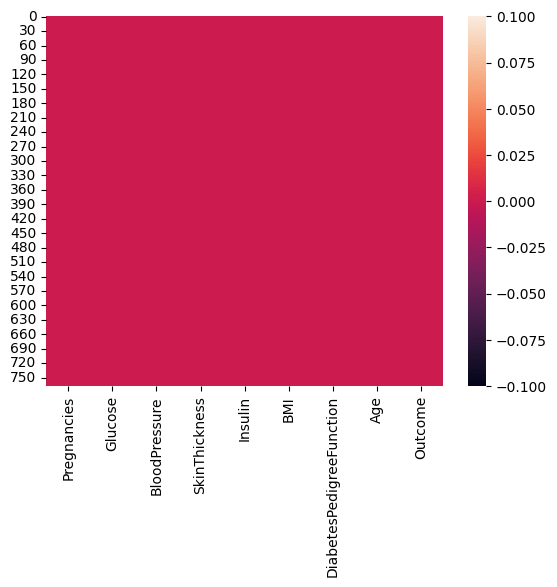

In [117]:
sns.heatmap(data.isnull())

In [118]:
correlation = data.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

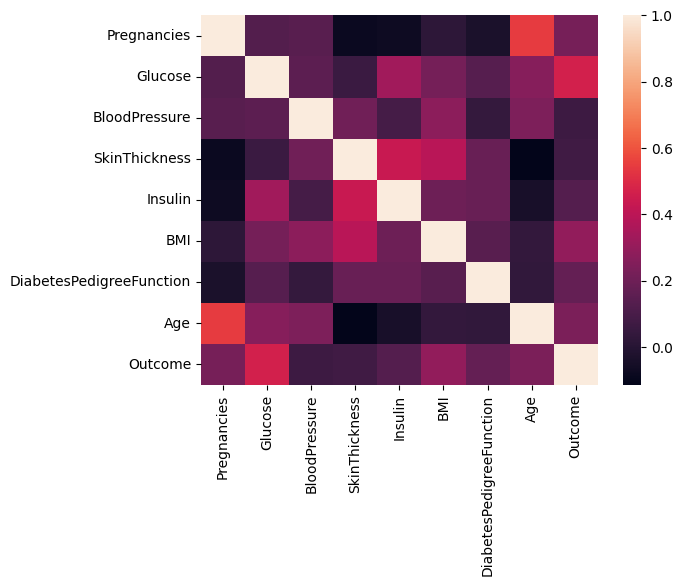

In [119]:
sns.heatmap(correlation)

In [120]:
X = data.drop('Outcome', axis=1)
Y = data['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
175,8,179,72,42,130,32.7,0.719,36
376,0,98,82,15,84,25.2,0.299,22
24,11,143,94,33,146,36.6,0.254,51
172,2,87,0,23,0,28.9,0.773,25
204,6,103,72,32,190,37.7,0.324,55
...,...,...,...,...,...,...,...,...
148,5,147,78,0,0,33.7,0.218,65
106,1,96,122,0,0,22.4,0.207,27
634,10,92,62,0,0,25.9,0.167,31
764,2,122,70,27,0,36.8,0.340,27


In [121]:
# Training model:

model = LogisticRegression()
model.fit(X_train, Y_train)

/Users/hiephuynh/Documents/myapps/Doctor_AI/backend/my-venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [122]:
predictions = model.predict(X_test)
print(predictions)

[0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0
 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1
 0 1 0 0 0 0]


In [123]:
#Evalutate:

accuracy = accuracy_score(predictions, Y_test)
print(accuracy)

0.7727272727272727


In [125]:
import numpy as np
input_data = np.array([[1, 122, 90, 51, 220, 49.7, 0.325, 31]])
pred = model.predict(input_data) 
print(pred)

[0]


/Users/hiephuynh/Documents/myapps/Doctor_AI/backend/my-venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
